# Linear Regression

### Introduction

We will be implementing Linear Regression and Logistic Regression models for the provided datasets from scratch, and will be familiarizing yourself with the corresponding scikit-learn APIs. A description of the problem statement is given at the start of each part.

* The folder named `LinearReg_HomeDataset` will be used for Linear Regression.

* The folder named `LogisticReg_Dataset` will be used for Logistic Regression.



## Multivariate Linear Regression

In this part, we will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s.

To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.

- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

### Implementation from Scratch


In [2]:
pip --version

pip 25.2 from c:\Program Files\Python313\Lib\site-packages\pip (python 3.13)

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

train_data = np.loadtxt('trainData.txt', delimiter=' ')
train_labels = np.loadtxt('trainLabels.txt') 
test_data = np.loadtxt('testData.txt', delimiter=' ')
test_labels = np.loadtxt('testLabels.txt')
# print(train_labels)

In [3]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        return self.fit(X).transform(X)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.transform(test_data)
# print(X_train_scaled.shape)
# print(train_labels.shape)

100%|██████████| 5000/5000 [00:00<00:00, 71880.34it/s]

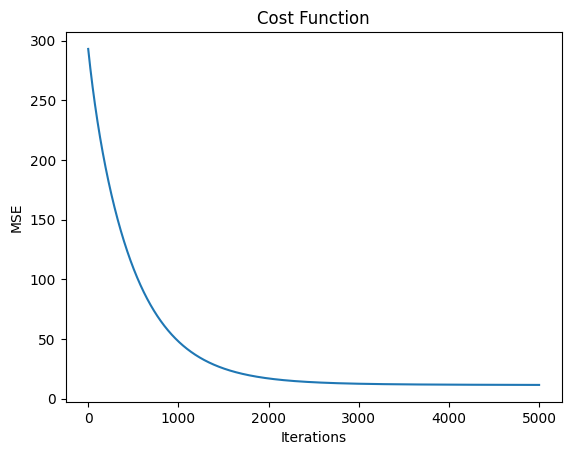

MSE for Train set: 11.486433908805788
MSE for Test set: 10.857856685350734


In [4]:
from tqdm import tqdm

class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iterations=5000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.loss = []

    def score(self, y_true, y_pred):
        return (np.sum((y_true - y_pred) ** 2)) / (2 * len(y_true))

    def fit(self, X, y):
        m, _ = X.shape
        X = np.c_[np.ones((m, 1)), X]
        self.theta = np.zeros(X.shape[1])
        
        for iteration in tqdm(range(self.n_iterations)):
            predictions = X.dot(self.theta)
            error = predictions - y
            self.loss.append(self.score(y, predictions))
            gradients = (1 / len(X)) * X.T.dot(error)
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return X.dot(self.theta)


# print(X_train_scaled.shape)
# print(train_labels.shape)
model = LinearRegression()
model.fit(X_train_scaled, train_labels)

plt.plot(model.loss)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Cost Function')
plt.show()

print(f"MSE for Train set: {model.score(train_labels, model.predict(X_train_scaled))}")
print(f"MSE for Test set: {model.score(test_labels, model.predict(X_test_scaled))}")



### Regularized Linear Regression Using Scikit-learn 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet

In [6]:

model = LinearRegression()
model.fit(X_train_scaled, train_labels)


train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

train_mse = mean_squared_error(train_labels, train_preds)
test_mse = mean_squared_error(test_labels, test_preds)

print(f"Linear Regression Train MSE: {train_mse}")
print(f"Linear Regression Test MSE: {test_mse}")

Linear Regression Train MSE: 22.004800838348142
Linear Regression Test MSE: 23.19559925642299


Optimal Alpha value: 1.0


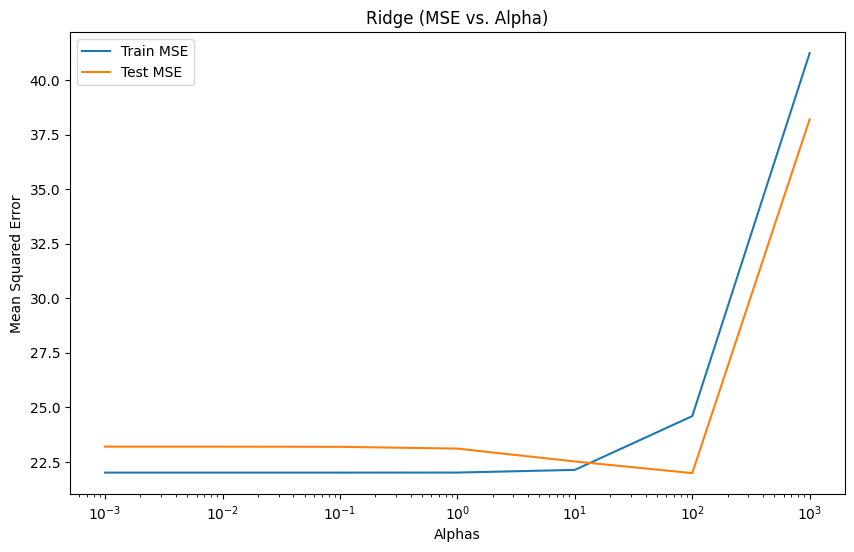

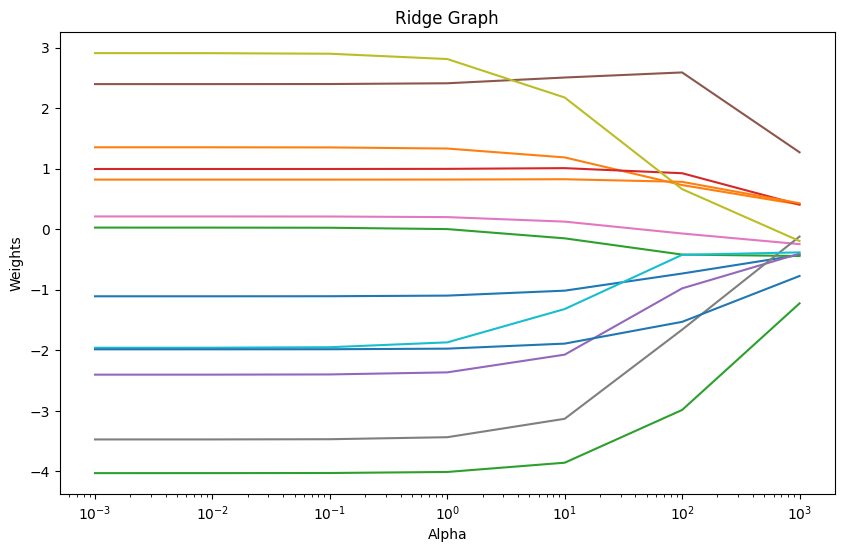

In [7]:


from sklearn.linear_model import RidgeCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

ridgecv = RidgeCV(alphas=alphas, store_cv_values=True)
ridgecv.fit(X_train_scaled, train_labels)

print(f"Optimal Alpha value: {ridgecv.alpha_}")

MSE_traindata = []
MSE_testdata = []
weights = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, train_labels)
    
    predictions_traindata = ridge.predict(X_train_scaled)
    predictions_testdata = ridge.predict(X_test_scaled)
    
    MSE_traindata.append(mean_squared_error(train_labels, predictions_traindata))
    MSE_testdata.append(mean_squared_error(test_labels, predictions_testdata))
    weights.append(ridge.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, MSE_traindata, label="Train MSE")
plt.plot(alphas, MSE_testdata, label="Test MSE")
plt.xscale('log')
plt.xlabel('Alphas')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Ridge (MSE vs. Alpha)')
plt.show()

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, weights)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Ridge Graph')
plt.show()


Optimal Alpha value: 0.001


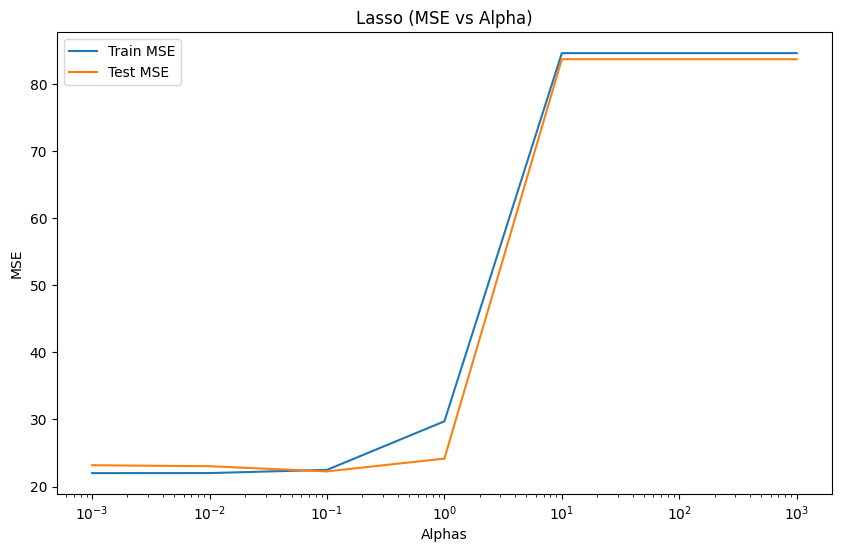

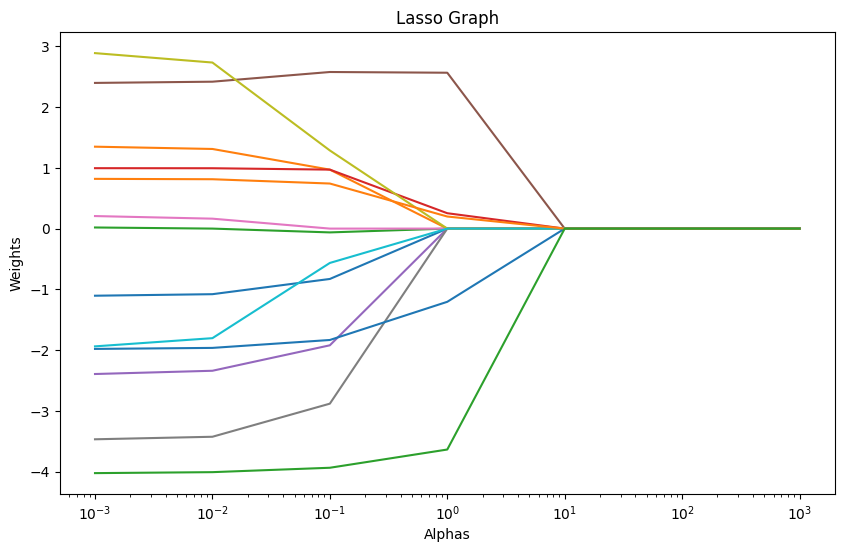

In [8]:
from sklearn.linear_model import LassoCV

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
lassocv = LassoCV(alphas=alphas, cv=5)
lassocv.fit(X_train_scaled, train_labels)

print(f"Optimal Alpha value: {lassocv.alpha_}")

MSE_traindata = []
MSE_testdata = []
weights = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, train_labels)
    
    predictions_traindata = lasso.predict(X_train_scaled)
    predictions_testdata = lasso.predict(X_test_scaled)
    
    MSE_traindata.append(mean_squared_error(train_labels, predictions_traindata))
    MSE_testdata.append(mean_squared_error(test_labels, predictions_testdata))
    weights.append(lasso.coef_)


plt.figure(figsize=(10,6))
plt.plot(alphas, MSE_traindata, label="Train MSE")
plt.plot(alphas, MSE_testdata, label="Test MSE")
plt.xscale('log')
plt.xlabel('Alphas')
plt.ylabel('MSE')
plt.legend()
plt.title('Lasso (MSE vs Alpha)')
plt.show()

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(alphas, weights)
ax.set_xscale('log')
plt.xlabel('Alphas')
plt.ylabel('Weights')
plt.title('Lasso Graph')
plt.show()

In [9]:

alpha=0.001
elastic_net = ElasticNet(alpha=0.001)
elastic_net.fit(X_train_scaled, train_labels)

train_preds = elastic_net.predict(X_train_scaled)
test_preds = elastic_net.predict(X_test_scaled)

train_mse = mean_squared_error(train_labels, train_preds)
test_mse = mean_squared_error(test_labels, test_preds)

print(f"Elastic Net (alpha={alpha}) Train MSE: {train_mse}")
print(f"Elastic Net (alpha={alpha}) Test MSE: {test_mse}")

Elastic Net (alpha=0.001) Train MSE: 22.004970878068825
Elastic Net (alpha=0.001) Test MSE: 23.169390834021165
